Author: KuoChen Huang

Reference: 
1. https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.normalize.html
2. https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html
3. https://vitalflux.com/accuracy-precision-recall-f1-score-python-example/
4. https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_recall_fscore_support.html
5. https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html
6. https://docs.scipy.org/doc/scipy/reference/generated/scipy.spatial.distance.cdist.html
7. https://scikit-learn.org/stable/modules/generated/sklearn.cluster.SpectralClustering.html
8. https://blog.csdn.net/xlinsist/article/details/51346523

## 1. Supervised, Semi-Supervised, and Unsupervised Learning

### (a) Download the Breast Cancer Wisconsin (Diagnostic) Data Set from:
https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29. Download the data in https://archive.ics.uci.edu/ml/ machine-learning-databases/breast-cancer-wisconsin/wdbc.data, which has IDs, classes (Benign=B, Malignant=M), and 30 attributes. This data has two output classes.

In [1]:
import pandas as pd
import numpy as np

In [2]:
dataset = pd.read_csv('../data/wdbc.data', header=None)
dataset.rename({0:'IDs', 1:'class'}, axis = 1, inplace = True)
for i in range(2,32):
    dataset.rename({i:i-1}, axis = 1, inplace = True)
dataset.replace('M', 1, inplace=True)
dataset.replace('B', 0, inplace=True)

In [3]:
dataset

,IDs,class,1,2,3,4,5,6,7,8,...,21,22,23,24,25,26,27,28,29,30
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,1,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


### (b) Monte-Carlo Simulation: Repeat the following procedures for supervised, unsupervised, and semisupervised learning M = 30 times, and use randomly selected train and test data (make sure you use 20% of both the positve and negative classes as the test set). Then compare the average scores (accuracy, precision, recall, F1-score, and AUC) that you obtain from each algorithm.

In [4]:
from sklearn.model_selection import train_test_split

In [5]:
x_data = dataset.drop(['IDs','class'],axis=1)
y_data = dataset['class']

x_training, x_testing, y_training, y_testing = train_test_split(x_data, y_data, test_size = 0.2, random_state = 526)

In [6]:
print("==================== Training set size ====================")
print("X: ", x_training.shape)
print("Y: ", y_training.shape)
print("==================== Testing set size ====================")
print("X: ", x_testing.shape)
print("Y: ", y_testing.shape)

==================== Training set size ====================
X:  (455, 30)
Y:  (455,)
==================== Testing set size ====================
X:  (114, 30)
Y:  (114,)


#### i. Supervised Learning: Train an L1-penalized SVM to classify the data. Use 5 fold cross validation to choose the penalty parameter. Use normalized data. Report the average accuracy, precision, recall, F1-score, and AUC, for both training and test sets over your M runs. Plot the ROC and report the confusion matrix for training and testing in one of the runs.

In [96]:
from sklearn.svm import LinearSVC
from sklearn import preprocessing
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_fscore_support as accuracy_score

In [18]:
def calculate_precision_recall(matrix):
    
    tn, fp, fn, tp = matrix.ravel()
    
    recall = tp / (tp + fn)     
    precision = tp / (tp + fp)
    
    '''
    tp_and_fn = matrix.sum(1)
    tp_and_fp = matrix.sum(0)
    tp = matrix.diagonal()

    precision = tp / tp_and_fp
    recall = tp / tp_and_fn
    '''  
    return precision, recall

In [23]:
dict_name = ['accuracy', 'precision', 'recall', 'f1_score', 'AUC']

training_info = dict()
testing_info = dict()

for name in dict_name:
    training_info[name] = list()
    testing_info[name] = list()

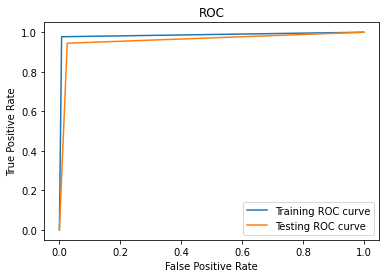

==================== Training Information ====================
Average Accuracy:  0.9831501831501832
Average Precision:  0.9837329699629791
Average Recall:  0.9709840502894137
Average F1_score:  0.9773012951785321
Average AUC:  0.9806952959352796

==================== Testing Information ====================
Average Accuracy:  0.9672514619883039
Average Precision:  0.9600744398720303
Average Recall:  0.9497139296189048
Average F1_score:  0.9541875988692232
Average AUC:  0.9637435548862128


In [24]:
M = 30
for i in range(M):
    
    x_training, x_testing, y_training, y_testing = train_test_split(x_data, y_data, test_size = 0.2)
    
    # preprocessing(normalize) the data
    x_training_normalize = preprocessing.normalize(x_training)
    x_testing_normalize = preprocessing.normalize(x_testing)
    
    # set the penalty parameter range
    parameters = {'C': [10**c for c in np.arange(-5,10, dtype=float)]}

    SVC_L1_Model = LinearSVC(penalty = 'l1', dual = False)

    L1_clf1 = GridSearchCV(SVC_L1_Model, parameters, cv = 5).fit(x_training_normalize, y_training)
    L1_clf1_model = L1_clf1.best_estimator_

    y_training_predict = L1_clf1_model.predict(x_training_normalize)
    y_testing_predict = L1_clf1_model.predict(x_testing_normalize)
    
    # Accuracy
    training_info['accuracy'].append(L1_clf1_model.score(x_training_normalize, y_training))
    testing_info['accuracy'].append(L1_clf1_model.score(x_testing_normalize, y_testing))
    
    # Confusion Matrix
    training_confusion_matrix = confusion_matrix(y_training, y_training_predict)
    testing_confusion_matrix = confusion_matrix(y_testing, y_testing_predict)
    
    # Precision and Recall
    tp1, tr1 = calculate_precision_recall(training_confusion_matrix)
    training_info['precision'].append(tp1)
    training_info['recall'].append(tr1)
    
    tp2, tr2 = calculate_precision_recall(testing_confusion_matrix)
    testing_info['precision'].append(tp2)
    testing_info['recall'].append(tr2)
    
    #training_precision, training_recall = calculate_precision_recall(training_confusion_matrix)
    #testing_precision, testing_recall = calculate_precision_recall(testing_confusion_matrix)

    # F1-Score
    training_info['f1_score'].append(2 * (tp1 * tr1)/(tp1 + tr1)) 
    testing_info['f1_score'].append(2 * (tp2 * tr2)/(tp2 + tr2))

    # AUC
    training_fpr, training_tpr, training_threshold = roc_curve(y_training, y_training_predict)
    testing_fpr, testing_tpr, testing_threshold = roc_curve(y_testing, y_testing_predict)
    training_info['AUC'].append(auc(training_fpr, training_tpr))
    testing_info['AUC'].append(auc(testing_fpr, testing_tpr))
    
    # I choose the last iteration to plor the ROC
    if i == 29:
        plt.plot(training_fpr, training_tpr, label = 'Training ROC curve')
        plt.plot(testing_fpr, testing_tpr, label = 'Testing ROC curve')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('ROC')
        plt.legend()
        plt.show()

print("==================== Training Information ====================")
print("Average Accuracy: ", np.average(training_info['accuracy']))
print("Average Precision: ", np.average(training_info['precision']))
print("Average Recall: ", np.average(training_info['recall']))
print("Average F1_score: ", np.average(training_info['f1_score']))
print("Average AUC: ", np.average(training_info['AUC']))
print()
print("==================== Testing Information ====================")
print("Average Accuracy: ", np.average(testing_info['accuracy']))
print("Average Precision: ", np.average(testing_info['precision']))
print("Average Recall: ", np.average(testing_info['recall']))
print("Average F1_score: ", np.average(testing_info['f1_score']))
print("Average AUC: ", np.average(testing_info['AUC']))

#### ii. Semi-Supervised Learning/ Self-training: select 50% of the positive class along with 50% of the negative class in the training set as labeled data and the rest as unlabelled data. You can select them randomly.

In [35]:
x_training, x_testing, y_training, y_testing = train_test_split(x_data, y_data, test_size = 0.2, random_state = 100)
x_training_normalize = preprocessing.normalize(x_training)
x_testing_normalize = preprocessing.normalize(x_testing)

x_training_labeled, x_training_unlabeled, y_training_labeled, y_training_unlabeled \
= train_test_split(x_training_normalize, y_training, test_size = 0.5, random_state = 100, stratify = y_training)

In [36]:
# check the amounts of each label
pd.Series(y_training_labeled).value_counts()

0    146
1     81
Name: class, dtype: int64

In [38]:
print("Labeled data: ", len(y_training_labeled))
print("Unlabeled data: ", len(y_training_unlabeled))

Labeled data:  227
Unlabeled data:  228


##### A. Train an L1-penalized SVM to classify the labeled data Use normalized data. Choose the penalty parameter using 5 fold cross validation.

In [42]:
parameters = {'C': [10**c for c in np.arange(-5,10, dtype=float)]}

L1_clf2 = GridSearchCV(LinearSVC(penalty="l1", dual=False), parameters, cv=5)
L1_clf2.fit(x_training_labeled, y_training_labeled)

print("The best penalty parameter(C): ", L1_clf2.best_params_['C'])

The best penalty parameter(C):  1000000.0


##### B. Find the unlabeled data point that is the farthest to the decision boundary of the SVM. Let the SVM label it (ignore its true label), and add it to the labeled data, and retrain the SVM. Continue this process until all unlabeled data are used. Test the final SVM on the test data andthe average accuracy, precision, recall, F1-score, and AUC, for both training and test sets over your M runs. Plot the ROC and report the confusion matrix for training and testing in one of the runs.

In [280]:
semi_training_info = dict()
semi_testing_info = dict()

for name in dict_name:
    semi_training_info[name] = list()
    semi_testing_info[name] = list()

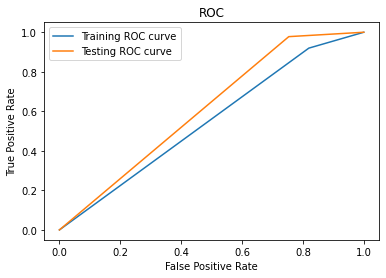

==================== Training Information ====================
Average Accuracy:  0.6923809523809525
Average Precision:  0.722026804124729
Average Recall:  0.8986342572027807
Average F1_score:  0.8004891338379415
Average AUC:  0.5695657692999149

==================== Testing Information ====================
Average Accuracy:  0.8280701754385966
Average Precision:  0.7085968760608963
Average Recall:  0.886727479346093
Average F1_score:  0.7455457973480901
Average AUC:  0.773873051121326


In [282]:
for i in range(M):
    # split the dataset into training/testing and labeled/unlabeled
    
    x_training, x_testing, y_training, y_testing = train_test_split(x_data, y_data, test_size = 0.2)
    x_training_normalize = preprocessing.normalize(x_training)
    x_testing_normalize = preprocessing.normalize(x_testing)
    
    x_training_normalize = pd.DataFrame(x_training_normalize)
    x_testing_normalize = pd.DataFrame(x_testing_normalize)
    
    x_training_labeled, x_training_unlabeled, y_training_labeled, y_training_unlabeled \
    = train_test_split(x_training_normalize, y_training, test_size = 0.5, stratify = y_training)
    
    parameters = {'C': np.linspace(1, 5, 10)}
    
    # build the model and find the vest estimator
    L1_clf2 = GridSearchCV(LinearSVC(penalty="l1", dual=False), parameters, cv=5, n_jobs=-1)
    L1_clf2.fit(x_training_labeled, y_training_labeled)
    
    y_training_true_labeled = y_training_labeled
                                  
    # start to predict the unlabeled data and add it to the labeled data
    while len(x_training_unlabeled) > 0:

        # calculate all distances between each data point and the boundary
        distance = np.abs(L1_clf2.decision_function(x_training_unlabeled))
        # find the data point with the maximum distance
        target = distance.argmax()
        
        # predict the target data point
        if distance[target] < 0:
            target_predict = 0 
        else:
            target_predict = 1
        
        x_training_labeled = np.append(x_training_labeled, [x_training_unlabeled.iloc[target]], axis = 0)
        y_training_labeled = y_training_labeled.append(pd.Series(target_predict))
        x_training_unlabeled = x_training_unlabeled.drop(x_training_unlabeled.index[target])
        
        '''
        target_point = np.array(x_training_unlabeled[target]).reshape(1, 30)
        target_predict = L1_clf2.best_estimator_.predict(target_point)       
        
        temp = list(y_training_true_labeled)
        label = list(y_training_unlabeled)[target]
        temp.append(label)
        y_training_true_labeled = pd.Series(temp)
        '''                           
        
        #print(len(y_training_true_labeled))
        #y_training_labeled = np.append(y_training_labeled, target_predict, axis=0)

        L1_clf2.fit(x_training_labeled, y_training_labeled)
    
    
    semi_y_training_predict = L1_clf2.predict(x_training_labeled)
    semi_y_testing_predict = L1_clf2.predict(x_testing)
    
    #print(L1_clf2.score(x_training_labeled, y_training_labeled))
    # Accuracy
    semi_training_info['accuracy'].append(L1_clf2.score(x_training_labeled, y_training_labeled))
    semi_testing_info['accuracy'].append(L1_clf2_model.score(x_testing, y_testing))
    
    # Confusion Matrix
    semi_training_confusion_matrix = confusion_matrix(y_training_labeled, semi_y_training_predict)
    semi_testing_confusion_matrix = confusion_matrix(y_testing, semi_y_testing_predict)
    
    # Precision and Recall
    semi_tp1, semi_tr1 = calculate_precision_recall(semi_training_confusion_matrix)
    semi_training_info['precision'].append(semi_tp1)
    semi_training_info['recall'].append(semi_tr1)
    
    semi_tp2, semi_tr2 = calculate_precision_recall(semi_testing_confusion_matrix)
    semi_testing_info['precision'].append(semi_tp2)
    semi_testing_info['recall'].append(semi_tr2) 
    
    # F1-Score
    semi_training_info['f1_score'].append(2 * (semi_tp1 * semi_tr1)/(semi_tp1 + semi_tr1)) 
    semi_testing_info['f1_score'].append(2 * (semi_tp2 * semi_tr2)/(semi_tp2 + semi_tr2))

    # AUC
    semi_training_fpr, semi_training_tpr, semi_training_threshold = roc_curve( y_training_labeled, semi_y_training_predict)
    semi_testing_fpr, semi_testing_tpr, semi_testing_threshold = roc_curve(y_testing, semi_y_testing_predict)
    semi_training_info['AUC'].append(auc(semi_training_fpr, semi_training_tpr))
    semi_testing_info['AUC'].append(auc(semi_testing_fpr, semi_testing_tpr))
    
    # I choose the last iteration to plor the ROC
    if i == 29:
        plt.plot(semi_training_fpr, semi_training_tpr, label = 'Training ROC curve')
        plt.plot(semi_testing_fpr, semi_testing_tpr, label = 'Testing ROC curve')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('ROC')
        plt.legend()
        plt.show() 

print("==================== Training Information ====================")
print("Average Accuracy: ", np.average(semi_training_info['accuracy']))
print("Average Precision: ", np.average(semi_training_info['precision']))
print("Average Recall: ", np.average(semi_training_info['recall']))
print("Average F1_score: ", np.average(semi_training_info['f1_score']))
print("Average AUC: ", np.average(semi_training_info['AUC']))
print()
print("==================== Testing Information ====================")
print("Average Accuracy: ", np.average(semi_testing_info['accuracy']))
print("Average Precision: ", np.average(semi_testing_info['precision']))
print("Average Recall: ", np.average(semi_testing_info['recall']))
print("Average F1_score: ", np.average(semi_testing_info['f1_score']))
print("Average AUC: ", np.average(semi_testing_info['AUC']))

#### iii. Unsupervised Learning: Run k-means algorithm on the whole training set. Ignore the labels of the data, and assume k = 2.

##### A. Run the k-means algorithm multiple times. Make sure that you initialize the algoritm randomly. How do you make sure that the algorithm was not trapped in a local minimum?

I would run algorithm multiple times to avoid being trapped in local minimum.

In [420]:
from sklearn.cluster import KMeans
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics.pairwise import euclidean_distances
from scipy.spatial.distance import cdist

In [426]:
kmeans_training_info = dict()
kmeans_testing_info = dict()

for name in dict_name:
    kmeans_training_info[name] = list()
    kmeans_testing_info[name] = list()

##### B. Compute the centers of the two clusters and find the closest 30 data points to each center. Read the true labels of those 30 data points and take a majority poll within them. The majority poll becomes the label predicted by k-means for the members of each cluster. Then compare the labels provided by k-means with the true labels of the training data and report the average accuracy, precision, recall, F1-score, and AUC over M runs, and ROC and the confusion matrix for one of the runs.

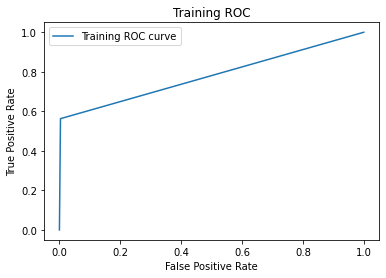

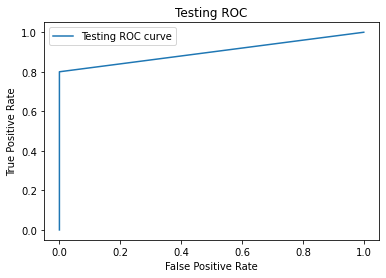

==================== Training Information ====================
Average Accuracy:  0.851973378733942
Average Precision:  0.9013508432983223
Average Recall:  0.8027117958474469
Average F1_score:  0.8240141332556304
Average AUC:  0.802711795847447


In [441]:
for i in range(M):
    
    distance_0 = dict()
    distance_1 = dict()
    
    x_training, x_testing, y_training, y_testing = train_test_split(x_data, y_data, test_size = 0.2)
    
    y_training.reset_index()
    
    # k=2
    k_means_clf = KMeans(n_clusters = 2, init = 'random', n_init = 50).fit(x_training)
    # get each label from clustering
    labels = k_means_clf.labels_
    
    # Find the closet 30 data points(training)
    closet_1_index = np.argsort(cdist(x_training, k_means_clf.cluster_centers_, 'euclidean')[:, 0])[:30]
    closet_2_index = np.argsort(cdist(x_training, k_means_clf.cluster_centers_, 'euclidean')[:, 1])[:30]
    
    closet_1_point = y_training.iloc[closet_1_index]
    closet_2_point = y_training.iloc[closet_2_index]
    
    # Find the majority label
    label1 = closet_1_point.value_counts().index[0]
    label2 = closet_2_point.value_counts().index[0]
    
    # Find the distance between test point and cluster centroid
    test_dist_1 = cdist(x_testing, k_means_clf.cluster_centers_, 'euclidean')[:, 0]
    test_dist_2 = cdist(x_testing, k_means_clf.cluster_centers_, 'euclidean')[:, 1]    
    
    # Label each data point with their predict value
    training_prediction = list()
    testing_prediction = list()
    
    
    for data in range(len(x_training)):
        if labels[data] == 0:
            training_prediction.append(label1)
        else:
            training_prediction.append(label2)
    
    for index in range(len(x_testing)):
        if test_dist_1[index] <= test_dist_2[index]:
            testing_prediction.append(label1)
        else:
            testing_prediction.append(label2)
    
    # Training
    training_precision, training_recall, training_f1_score, training_threshold = \
    precision_recall_fscore_support(y_training, training_prediction)
    
    training_cm = confusion_matrix(y_training, training_prediction)
    training_tn, training_fp, training_fn, training_tp = training_cm.ravel()
    
    kmeans_training_info['accuracy'].append((training_tn + training_tp)/(training_tn + training_fp + training_fn + training_tp))
    kmeans_training_info['precision'].append(training_precision)
    kmeans_training_info['recall'].append(training_recall)
    kmeans_training_info['f1_score'].append(training_f1_score)
  
    kmeans_training_fpr, kmeans_training_tpr, kmeans_training_threshold = roc_curve(y_training, training_prediction)
    kmeans_training_info['AUC'].append(auc(kmeans_training_fpr, kmeans_training_tpr))
    
    
    # Testing
    testing_precision, testing_recall, testing_f1_score, testing_threshold = \
    precision_recall_fscore_support(y_testing, testing_prediction)

    testing_cm = confusion_matrix(y_testing, testing_prediction)
    testing_tn, testing_fp, testing_fn, testing_tp = testing_cm.ravel()
    kmeans_testing_info['accuracy'].append((testing_tn + testing_tp)/(testing_tn + testing_fp + testing_fn + testing_tp))
    kmeans_testing_info['precision'].append(testing_precision)
    kmeans_testing_info['recall'].append(testing_recall)
    kmeans_testing_info['f1_score'].append(testing_f1_score)
  
    kmeans_testing_fpr, kmeans_testing_tpr, kmeans_testing_threshold = roc_curve(y_testing, testing_prediction)
    kmeans_testing_info['AUC'].append(auc(kmeans_testing_fpr, kmeans_testing_tpr))
    
    # I choose the last iteration to plor the ROC
    if i == 29:
        plt.plot(kmeans_training_fpr, kmeans_training_tpr, label = 'Training ROC curve')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('Training ROC')
        plt.legend()
        plt.show() 
        
        plt.plot(kmeans_testing_fpr, kmeans_testing_tpr, label = 'Testing ROC curve')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('Testing ROC')
        plt.legend()
        plt.show() 
        
print("==================== Training Information ====================")
print("Average Accuracy: ", np.average(kmeans_training_info['accuracy']))
print("Average Precision: ", np.average(kmeans_training_info['precision']))
print("Average Recall: ", np.average(kmeans_training_info['recall']))
print("Average F1_score: ", np.average(kmeans_training_info['f1_score']))
print("Average AUC: ", np.average(kmeans_training_info['AUC']))

##### C. Classify test data based on their proximity to the centers of the clusters. Report the average accuracy, precision, recall, F1-score, and AUC over M runs, and ROC and the confusion matrix for one of the runs for the test data.2

In [442]:
print("==================== Testing Information ====================")
print("Average Accuracy: ", np.average(kmeans_testing_info['accuracy']))
print("Average Precision: ", np.average(kmeans_testing_info['precision']))
print("Average Recall: ", np.average(kmeans_testing_info['recall']))
print("Average F1_score: ", np.average(kmeans_testing_info['f1_score']))
print("Average AUC: ", np.average(kmeans_testing_info['AUC']))

==================== Testing Information ====================
Average Accuracy:  0.8539961013645224
Average Precision:  0.9021295840340002
Average Recall:  0.802539141136402
Average F1_score:  0.8236670637653685
Average AUC:  0.8025391411364021


##### iv. Spectral Clustering: Repeat 1(b)iii using spectral clustering, which is clustering based on kernels. Research what spectral clustering is. Use RBF kernel with gamma=1 or find a gamma for which the two clutsres have the same balance as the one in original data set (if the positive class has p and the negative class has n samples, the two clusters must have p and n members). Do not label data based on their proximity to cluster center, because spectral clustering may give you non-convex clusters . Instead, use fit  predict method.

In [490]:
from sklearn.cluster import SpectralClustering

In [491]:
spectral_training_info = dict()
spectral_testing_info = dict()

for name in dict_name:
    spectral_training_info[name] = list()
    spectral_testing_info[name] = list()

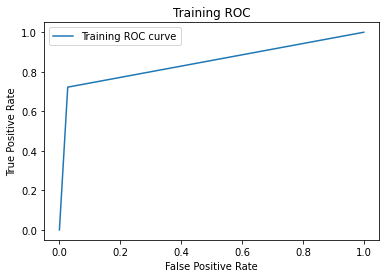

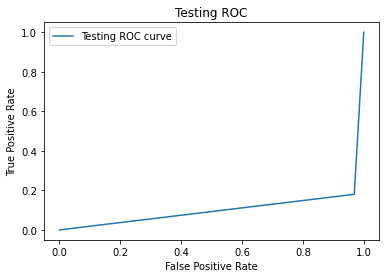

==================== Training Information ====================
Average Accuracy:  0.8860073260073261
Average Precision:  0.9082890329740695
Average Recall:  0.8528472776115753
Average F1_score:  0.870047217413772
Average AUC:  0.8528472776115752

==================== Testing Information ====================
Average Accuracy:  0.5921052631578946
Average Precision:  0.5979450804894123
Average Recall:  0.5871034950746538
Average F1_score:  0.5798497756749446
Average AUC:  0.5871034950746538


In [492]:
for i in range(M):

    x_training, x_testing, y_training, y_testing = train_test_split(x_data, y_data, test_size = 0.2)
    x_training = preprocessing.normalize(x_training)
    x_testing = preprocessing.normalize(x_testing)
    
    y_training = np.array(y_training)
    
    spectral_clf = SpectralClustering(n_clusters = 2, affinity = "rbf", gamma = 1, n_init = 20)
    # get each label from clustering
    labels = spectral_clf.fit_predict(x_training)
    test_labels = spectral_clf.fit_predict(x_testing)
    
    training_cluster_0 = np.where(labels==0)
    training_cluster_1 = np.where(labels==1)
    
    # Find the majority of each cluster
    cluster_0 = np.argmax(np.bincount(y_training[training_cluster_0]))
    cluster_1 = np.argmax(np.bincount(y_training[training_cluster_1]))
    
    training_prediction = list()
    testing_prediction = list()
    
    for k in range(len(x_training)):
        if labels[k] == 0:
            training_prediction.append(cluster_0)
        else:
            training_prediction.append(cluster_1)
    
    for b in range(len(x_testing)):
        if test_labels[b] == 0:
            testing_prediction.append(cluster_0)
        else:
            testing_prediction.append(cluster_1)
            
    # Training
    training_precision, training_recall, training_f1_score, training_threshold = \
    precision_recall_fscore_support(y_training, training_prediction)
    
    training_cm = confusion_matrix(y_training, training_prediction)
    training_tn, training_fp, training_fn, training_tp = training_cm.ravel()
    
    spectral_training_info['accuracy'].append((training_tn + training_tp)/(training_tn + training_fp + training_fn + training_tp))
    spectral_training_info['precision'].append(training_precision)
    spectral_training_info['recall'].append(training_recall)
    spectral_training_info['f1_score'].append(training_f1_score)
  
    spectral_training_fpr, spectral_training_tpr, spectral_training_threshold = roc_curve(y_training, training_prediction)
    spectral_training_info['AUC'].append(auc(spectral_training_fpr, spectral_training_tpr))
    
    # Testing
    testing_precision, testing_recall, testing_f1_score, testing_threshold = \
    precision_recall_fscore_support(y_testing, testing_prediction)

    testing_cm = confusion_matrix(y_testing, testing_prediction)
    testing_tn, testing_fp, testing_fn, testing_tp = testing_cm.ravel()
    spectral_testing_info['accuracy'].append((testing_tn + testing_tp)/(testing_tn + testing_fp + testing_fn + testing_tp))
    spectral_testing_info['precision'].append(testing_precision)
    spectral_testing_info['recall'].append(testing_recall)
    spectral_testing_info['f1_score'].append(testing_f1_score)
  
    spectral_testing_fpr, spectral_testing_tpr, spectral_testing_threshold = roc_curve(y_testing, testing_prediction)
    spectral_testing_info['AUC'].append(auc(spectral_testing_fpr, spectral_testing_tpr))
    
    # I choose the last iteration to plor the ROC
    if i == 29:
        plt.plot(spectral_training_fpr, spectral_training_tpr, label = 'Training ROC curve')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('Training ROC')
        plt.legend()
        plt.show() 
        
        plt.plot(spectral_testing_fpr, spectral_testing_tpr, label = 'Testing ROC curve')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('Testing ROC')
        plt.legend()
        plt.show() 
        
print("==================== Training Information ====================")
print("Average Accuracy: ", np.average(spectral_training_info['accuracy']))
print("Average Precision: ", np.average(spectral_training_info['precision']))
print("Average Recall: ", np.average(spectral_training_info['recall']))
print("Average F1_score: ", np.average(spectral_training_info['f1_score']))
print("Average AUC: ", np.average(spectral_training_info['AUC']))
print()
print("==================== Testing Information ====================")
print("Average Accuracy: ", np.average(spectral_testing_info['accuracy']))
print("Average Precision: ", np.average(spectral_testing_info['precision']))
print("Average Recall: ", np.average(spectral_testing_info['recall']))
print("Average F1_score: ", np.average(spectral_testing_info['f1_score']))
print("Average AUC: ", np.average(spectral_testing_info['AUC']))

##### v. One can expect that supervised learning on the full data set works better than semi-supervised learning with half of the data set labeled.One can expect that unsupervised learning underperforms in such situations. Compare the results you obtained by those methods.


As expected, supervised learning got the best performance.  
However, from the result i got, unsupervised learning(k-means clustering) seems to perform better than semi-supervised learning in this problem.

## Active Learning Using Support Vector Machines

### (a) Download the banknote authentication Data Set from: https://archive.ics.uci.edu/ml/datasets/banknote+authentication. Choose 472 data points randomly as the test set, and the remaining 900 points as the training set. This is a binary classification problem.

In [679]:
dataset_2 = pd.read_csv('../data/data_banknote_authentication.txt', header=None)
x_data_q2 = dataset_2.iloc[:,:-1]
y_data_q2 = dataset_2.iloc[:,-1]
x_training_q2, x_testing_q2, y_training_q2, y_testing_q2 = train_test_split(x_data_q2, y_data_q2, test_size = 472/(900+472))

### (b) Repeat each of the following two procedures 50 times. You will have 50 errors for 90 SVMs per each procedure.

#### i. Traina SVM with a pool of 10 randomly selected data points from the training set using linear kernel and L1 penalty. Select the penalty parameter using 5-fold cross validation. Repeat this process by adding 10 other randomly selected data points to the pool, until you use all the 900 points. Do NOT replace the samples back into the training set at each step. Calculate the test error for each SVM. You will have 90 SVMs that were trained using 10, 20, 30, ... , 900 data points and their 90 test errors. You have implemented passive learning.

In [667]:
import random

In [671]:
svm_model = dict()

for i in range(50):
    
    x_training_set = pd.DataFrame()
    y_training_set = pd.DataFrame()
    
    x_training_pool = x_training_q2.copy()
    y_training_pool = y_training_q2.copy()
    y_training_pool = pd.DataFrame(y_training_pool)
    
    check_count = 0
    
    error = list()
    
    for k in range(90):  
        
        # add the training set and drop the training pool
        check_count += 1
        x_training_pool = x_training_pool.reset_index(drop = True)  
        y_training_pool = y_training_pool.reset_index(drop = True)  
        
        index_list = list(x_training_pool.index)
        random_index = random.sample(index_list, 10)
        
        x_training_set = x_training_set.append(x_training_pool.iloc[random_index])
        y_training_set = y_training_set.append(y_training_pool.iloc[random_index])
        
        x_training_pool = x_training_pool.drop(x_training_pool.index[random_index]) 
        y_training_pool = y_training_pool.drop(y_training_pool.index[random_index])
        #print(check_count)
               
        parameters = {'C': [10**c for c in np.arange(-3, 3, dtype = float)]}
        
        SVC_L1_Model = LinearSVC(penalty = 'l1', dual = False)
        clf = GridSearchCV(SVC_L1_Model, parameters, cv = 5, n_jobs = -1)
        clf.fit(x_training_set, y_training_set)
        
        best_C = clf.best_params_['C']
        best_model = LinearSVC(penalty = 'l1', dual = False, C = best_C)
        best_model.fit(x_training_set, y_training_set)
        
        error.append(1 - best_model.score(x_testing_q2, y_testing_q2))
    svm_model[i] = error

In [672]:
pd.DataFrame(svm_model)

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
0,0.125000,0.122881,0.112288,0.080508,0.252119,0.120763,0.182203,0.122881,0.108051,0.150424,...,0.307203,0.016949,0.082627,0.144068,0.097458,0.103814,0.044492,0.154661,0.091102,0.197034
1,0.059322,0.116525,0.091102,0.120763,0.010593,0.080508,0.029661,0.038136,0.122881,0.163136,...,0.114407,0.042373,0.027542,0.044492,0.023305,0.038136,0.046610,0.057203,0.042373,0.036017
2,0.021186,0.025424,0.023305,0.025424,0.010593,0.061441,0.080508,0.036017,0.125000,0.057203,...,0.040254,0.069915,0.016949,0.042373,0.016949,0.033898,0.046610,0.025424,0.019068,0.069915
3,0.021186,0.027542,0.016949,0.025424,0.004237,0.027542,0.014831,0.016949,0.027542,0.046610,...,0.016949,0.057203,0.016949,0.063559,0.021186,0.033898,0.033898,0.031780,0.004237,0.010593
4,0.023305,0.016949,0.012712,0.025424,0.004237,0.027542,0.014831,0.019068,0.050847,0.016949,...,0.016949,0.027542,0.019068,0.029661,0.016949,0.033898,0.031780,0.014831,0.004237,0.004237
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,0.010593,0.004237,0.004237,0.010593,0.010593,0.004237,0.004237,0.004237,0.010593,0.010593,...,0.010593,0.004237,0.004237,0.004237,0.010593,0.004237,0.004237,0.004237,0.004237,0.010593
86,0.004237,0.004237,0.004237,0.010593,0.010593,0.004237,0.004237,0.004237,0.010593,0.010593,...,0.010593,0.004237,0.004237,0.004237,0.010593,0.004237,0.010593,0.004237,0.004237,0.010593
87,0.010593,0.004237,0.004237,0.010593,0.010593,0.004237,0.004237,0.004237,0.004237,0.010593,...,0.010593,0.004237,0.004237,0.004237,0.010593,0.004237,0.004237,0.010593,0.004237,0.010593
88,0.004237,0.004237,0.004237,0.010593,0.004237,0.004237,0.004237,0.004237,0.004237,0.004237,...,0.004237,0.004237,0.004237,0.004237,0.010593,0.004237,0.004237,0.004237,0.004237,0.010593


#### ii. Train a SVM with a pool of 10 randomly selected data points from the training set using linear kernel and L1 penalty. Select the parameters of the SVM with 5-fold cross validation. Choose the 10 closest data points in the training set to the hyperplane of the SVM and add them to the pool. Do not replace the samples back into the training set. Train a new SVM using the pool. Repeat this process until all training data is used. You will have 90 SVMs that were trained using 10, 20, 30,..., 900 data points and their 90 test errors. You have implemented active learning.

In [756]:
svm_model_2 = dict()

for i in range(50):
    
    x_training_set = pd.DataFrame()
    y_training_set = pd.DataFrame()
    
    x_training_pool = x_training_q2.copy()
    y_training_pool = y_training_q2.copy()
    y_training_pool = pd.DataFrame(y_training_pool)
    
    x_training_pool = x_training_pool.reset_index(drop = True)  
    y_training_pool = y_training_pool.reset_index(drop = True)
    
    index_list = list(x_training_pool.index)
    random_index = random.sample(index_list, 10)
    
    x_training_set = x_training_set.append(x_training_pool.iloc[random_index])
    y_training_set = y_training_set.append(y_training_pool.iloc[random_index])

    x_training_pool = x_training_pool.drop(x_training_pool.index[random_index]) 
    y_training_pool = y_training_pool.drop(y_training_pool.index[random_index])
    
    check_count = 0
    
    error = list()
    
    for k in range(90): 
        #print(k)
        parameters = {'C': [10**c for c in np.arange(-3, 3, dtype = float)]}
        SVC_L1_Model = LinearSVC(penalty = 'l1', dual = False)
        clf = GridSearchCV(SVC_L1_Model, parameters, cv = 5, n_jobs = -1)
        clf.fit(x_training_set, y_training_set)
        best_C = clf.best_params_['C']

        best_model = LinearSVC(penalty = 'l1', dual = False, C = best_C)
        best_model.fit(x_training_set, y_training_set)
        error.append(1 - best_model.score(x_testing_q2, y_testing_q2))
        
        if k != 89:
            # update the trainind set and training pool
            distance = np.abs(best_model.decision_function(x_training_pool))       
            # find the data point with the minimum distance
            target_index = np.argsort(distance)[:10]

            x_training_set = x_training_set.append(x_training_pool.iloc[target_index])
            y_training_set = y_training_set.append(y_training_pool.iloc[target_index])

            x_training_pool = x_training_pool.drop(x_training_pool.index[target_index]) 
            y_training_pool = y_training_pool.drop(y_training_pool.index[target_index])

            x_training_pool = x_training_pool.reset_index(drop = True)  
            y_training_pool = y_training_pool.reset_index(drop = True)
        
    svm_model_2[i] = error

In [757]:
pd.DataFrame(svm_model_2)

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
0,0.021186,0.150424,0.470339,0.141949,0.139831,0.112288,0.470339,0.125000,0.046610,0.182203,...,0.105932,0.366525,0.033898,0.046610,0.139831,0.105932,0.027542,0.355932,0.046610,0.141949
1,0.027542,0.042373,0.080508,0.025424,0.074153,0.072034,0.144068,0.036017,0.139831,0.036017,...,0.152542,0.036017,0.014831,0.065678,0.040254,0.031780,0.019068,0.101695,0.059322,0.057203
2,0.014831,0.031780,0.014831,0.052966,0.059322,0.038136,0.038136,0.048729,0.059322,0.019068,...,0.038136,0.021186,0.014831,0.038136,0.023305,0.038136,0.006356,0.040254,0.033898,0.019068
3,0.008475,0.023305,0.046610,0.012712,0.014831,0.033898,0.118644,0.057203,0.065678,0.016949,...,0.027542,0.021186,0.006356,0.025424,0.014831,0.019068,0.006356,0.144068,0.021186,0.012712
4,0.010593,0.019068,0.033898,0.014831,0.027542,0.025424,0.023305,0.040254,0.027542,0.010593,...,0.029661,0.008475,0.006356,0.021186,0.016949,0.014831,0.006356,0.027542,0.008475,0.010593
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,0.008475,0.008475,0.014831,0.008475,0.014831,0.014831,0.008475,0.010593,0.014831,0.014831,...,0.014831,0.014831,0.014831,0.008475,0.014831,0.008475,0.008475,0.012712,0.008475,0.014831
86,0.008475,0.008475,0.014831,0.008475,0.014831,0.014831,0.008475,0.010593,0.014831,0.014831,...,0.014831,0.014831,0.014831,0.014831,0.014831,0.008475,0.008475,0.012712,0.014831,0.014831
87,0.008475,0.008475,0.014831,0.008475,0.014831,0.014831,0.008475,0.010593,0.014831,0.014831,...,0.014831,0.014831,0.014831,0.014831,0.014831,0.008475,0.008475,0.010593,0.014831,0.014831
88,0.008475,0.008475,0.014831,0.008475,0.014831,0.014831,0.014831,0.010593,0.014831,0.014831,...,0.014831,0.014831,0.014831,0.014831,0.014831,0.008475,0.008475,0.012712,0.014831,0.014831


### (c) Average the 50 test errors for each of the incrementally trained 90 SVMs in 2(b)i and 2(b)ii. By doing so, you are performing a Monte Carlo simulation. Plot average test error versus number of training instances for both active and passive learners on the same figure and report your conclusions. Here, you are actually obtaining a learning curve by Monte-Carlo simulation.

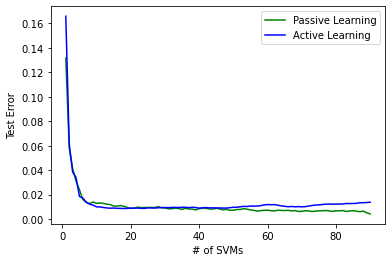

In [763]:
plt.plot([i for i in range(1,91)], pd.DataFrame(svm_model).T.mean(), color = 'green', label = 'Passive Learning')
plt.plot([i for i in range(1,91)], pd.DataFrame(svm_model_2).T.mean(), color = 'blue', label = 'Active Learning')
plt.xlabel('# of SVMs')
plt.ylabel('Test Error')
plt.legend()
plt.show()